In [2]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_pickle('../datos/Invistico_Airline_v3.pkl')
df.head(3)

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes,age,flight_distance
0,1,1,2,1,1,0,0,2,2,4,2,3,0,3,5,3,2,0.0,1.041667,-1.400844
1,1,0,2,1,2,0,0,3,0,2,2,4,4,4,2,3,2,305.0,0.291667,0.454852
2,1,1,2,1,1,0,0,3,2,0,2,3,3,4,4,4,2,0.0,-1.041667,0.179747


# Separamos nuestros datos 

In [4]:
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [5]:
X1.head(2)


,gender,customer_type,type_of_travel,class,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,arrival_delay_in_minutes,age,flight_distance
0,1,2,1,1,0,0,2,2,4,2,3,0,3,5,3,2,0.0,1.041667,-1.400844
1,0,2,1,2,0,0,3,0,2,2,4,4,4,2,3,2,305.0,0.291667,0.454852


In [6]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

In [7]:
df.drop(145, axis=0, inplace=True)

In [8]:
df.reset_index(inplace=True, drop=True)

In [9]:
X1.drop("arrival_delay_in_minutes", axis=1, inplace=True)

# separamos en train y test
- recordamos que los separamos:
  -para evaluar el rendimiento
 - evaluar la capacidad de generalizacion de patrones y tomar decisiones. Asi nos cv a permitir -evalar si el decision tree se ha ajustao demasiado a los datos de entrenamiento(overfitting) o si la capacidad es buena.
 - ajustar de hiperparametros: lo que afecta a la estructura y comportamiento del arbol de decisión

In [10]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [11]:
arbol = DecisionTreeClassifier(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train1, y_train1)

DecisionTreeClassifier(random_state=0)

# Max_depth 
- es la profundidad para alcanzar un arbol de deción

In [12]:
max_features = np.sqrt(len(x_train1.columns))
max_features

4.242640687119285

In [13]:
print(arbol.tree_.max_depth)

35


hacemos las predicciones sobre los dos se datos x_test y el x_train

In [14]:
y_pred_test_esta = arbol.predict(x_test1)
y_pred_train_esta = arbol.predict(x_train1)

# Sacamos las métricas 

In [15]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

# Esta función recibe los parametros para el test y para el entrenamiento del modelo 

In [16]:
dt_results1 = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Decission Tree Esta I")
dt_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.935864,0.938441,0.945528,0.941971,0.870293,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I


Definimos los parámetros que queremos modificar al apreciar un overfit en el modelo

In [17]:
param = {"max_depth": [2,4, 6, 10, 12, 14], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 


In [18]:
gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

Ajuste de modelo

In [19]:
gs.fit(x_train1, y_train1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [20]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=14, max_features=4, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [21]:
y_pred_test_esta2 = mejor_modelo.predict(x_test1)
y_pred_train_esta2 = mejor_modelo.predict(x_train1)

In [22]:
dt_results2 = metricas(y_test1, y_pred_test_esta2, y_train1,  y_pred_train_esta2, "Decision tree Esta II")
dt_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.922582,0.932807,0.926089,0.929436,0.843693,test,Decision tree Esta II
1,0.929993,0.938843,0.932659,0.935741,0.858859,train,Decision tree Esta II


In [23]:

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.935864,0.938441,0.945528,0.941971,0.870293,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.922582,0.932807,0.926089,0.929436,0.843693,test,Decision tree Esta II
1,0.929993,0.938843,0.932659,0.935741,0.858859,train,Decision tree Esta II


In [24]:
df_logistic_resul = pd.read_pickle('../datos/resultado_RL.pkl')
df_logistic_resul


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.834463,0.848152,0.851829,0.849986,0.665344,test,Regresión logistica
1,0.832826,0.845113,0.849875,0.847487,0.662538,train,Regresión logistica


In [25]:
df_DT_LR_results = pd.concat([df_logistic_resul, df_decision_results], axis = 0)
df_DT_LR_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.834463,0.848152,0.851829,0.849986,0.665344,test,Regresión logistica
1,0.832826,0.845113,0.849875,0.847487,0.662538,train,Regresión logistica
0,0.935864,0.938441,0.945528,0.941971,0.870293,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.922582,0.932807,0.926089,0.929436,0.843693,test,Decision tree Esta II
1,0.929993,0.938843,0.932659,0.935741,0.858859,train,Decision tree Esta II


In [26]:
df_DT_LR_results.to_pickle('../datos/resultados_metricas.pkl')

In [27]:
# vamos a crearnos un dataframe 
importancia_predictores_esta = pd.DataFrame(
                            {'predictor': x_train1.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_esta.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_esta

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
8,inflight_entertainment,0.242058
9,online_support,0.234368
4,seat_comfort,0.129068
3,class,0.089441
10,on-board_service,0.039891
1,customer_type,0.033344
14,cleanliness,0.028693
0,gender,0.028040
15,online_boarding,0.027056
16,age,0.024425


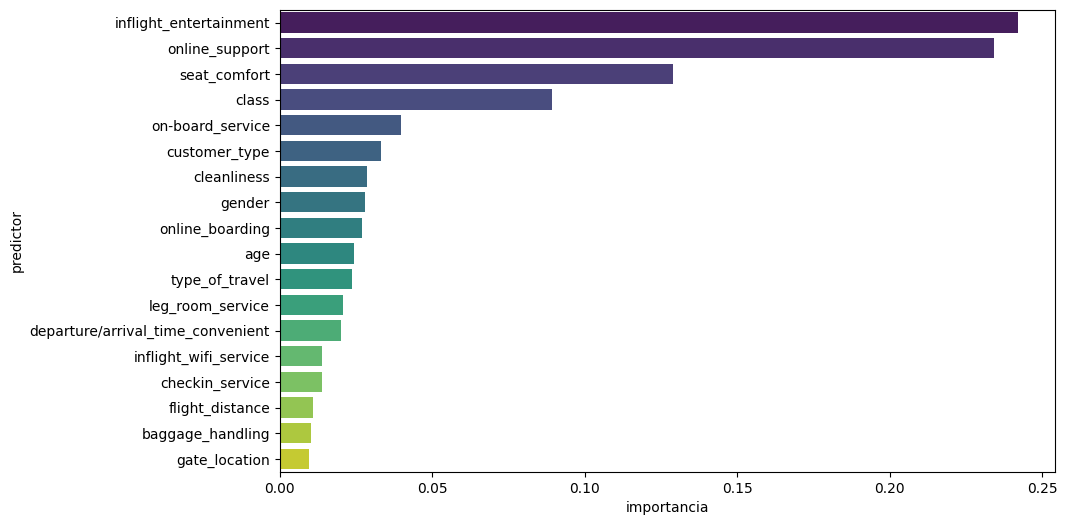

In [28]:


plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_esta, palette="viridis");
plt.show()



# Conclusiones 
- Si los valores del *train* son MUCHO MEJOR (que es tener métricas más altas) que los del *test* --> ***overfitting***. En este caso, nuestro modelo se estaría aprendiendo de memoria los datos de entrenamiento y no sería capaz de hacer buenas predicciones fuera de ese set de datos.
- Si los valores del *train* son MUCHO PEOR (valores de las métricas más bajas) que los del *test* --> ***underfitting***. En este caso, nuestro modelo no es lo suficientemente bueno para generalizar a los datos de test ni para modelar decentemente los del *train*.


Modelo Decission "Tree Esta I" en el train podemos ver un overfitting, es decir, se estaría aprendiendo los datos de memoria. Por lo tanto queda descartado.


Modelo "Regresion logistica":
-comentamos las métricas
 - Kappa: train:0.66, test:0.66 lo cual nos indica una concordancia buena.
 - accuracy: es de 0.84 lo cual nos indica un buen rendimiento del modelo en aciertos
 - precision: 0.84(test) 0.84(train) nos indica la proporción de verdaderos positivos
 - recall: mide la proporción de verdaderos positivos un alto recall indica que hay pocos falsos negativos train(0.84), test (0.85)
 - f1: es una media combinada de precisión y recall calculada, es decir, refleja la media armónica.
 Esto quiere decir que el modelo funciona y que el modelo no estaria funcionando de forma automáica

Modelo "Decision tree Esta II" comentamo las métricas:
- Kappa: train 0.85 nos enseña una buena medida de concordancia entre las predicciones del modelo 
- accuracy: es 0.92 nos enseña un buen rendiemiento del modelo 
- precision: es en train es de 0.93 y en test 0.93 nos enseña la proporción de los correctamente clasificados como verdaderos positivos
- recall: en train 0.93 y en test 0.92 un alto recall indica que hay pocos falsos negativos 
- f1: refleja la armonía 